<h1> Pre Process </h1>

In [2]:
import pandas as pd
import os
import tqdm

In [3]:
df = pd.read_csv('filtered_train_data_combined.csv')
std = pd.read_csv('stds_train_data.csv')

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns;
sns.set(style="white", color_codes=True)
def plot_results(cols,rows, cols_names,df, types, title=None):
    fig,axes = plt.subplots(rows,cols, figsize=(20,20))
    # fig.tight_layout(pad=3.0)
    axes = axes.ravel()
    for i,col in enumerate(cols_names):
        type = types[i]
        # if col!='Label':
        if type=='hist':
            sns.histplot(x=col,hue='Label',data=df, multiple="dodge", ax=axes[i])
            axes[i].set_title(col+' distribution by label')
        if type=='dist':
            sns.distplot(df[df['Label']==1][col], color='r',ax=axes[i])
            sns.distplot(df[df['Label']==0][col],ax=axes[i])
            axes[i].set_title(col+' distribution by label')
        elif type=='ts':
            axes[i].plot(df[df['Label']==1]['time_bm'],df[df['Label']==1][col], color='r')
            axes[i].plot(df[df['Label']==0]['time_bm'],df[df['Label']==0][col], color='b')
            axes[i].set_title(col+' change over time by label')
        elif type=='cat':
            sns.countplot(x=col, hue='Label', data=df, ax=axes[i])
            axes[i].set_title(col+' distribution by label')
        # else:
        #     sns.histplot(x=col,data=df, color='g',ax=axes[i])
        #     axes[i].set_title(col+' distribution')
    if title:
        plt.suptitle(title)

/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/data/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

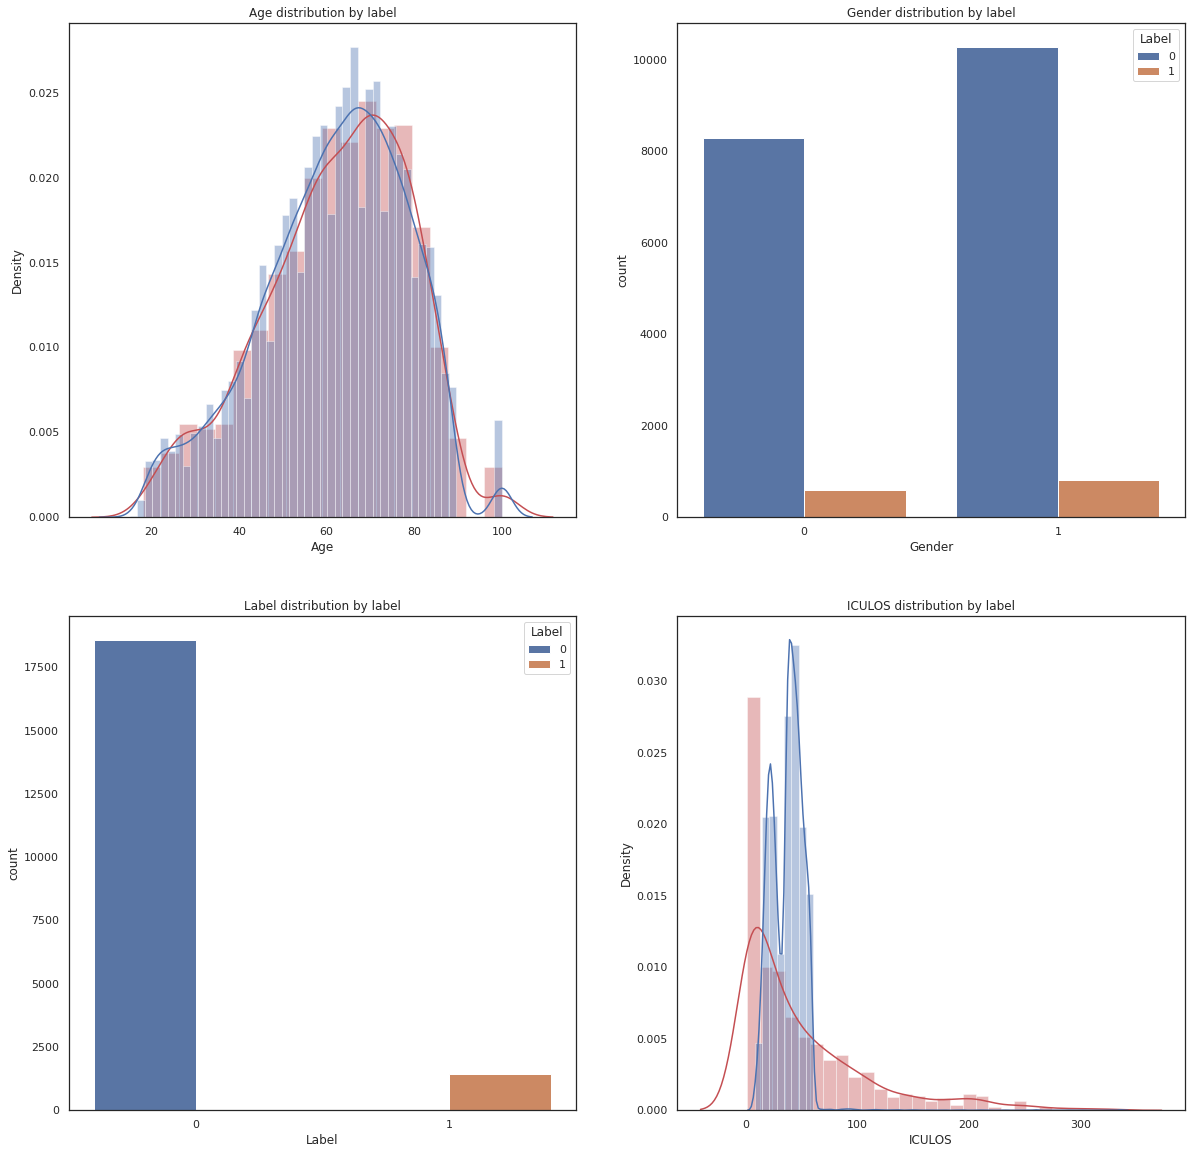

In [26]:
demo_cols = ['Age', 'Gender', 'Label', 'ICULOS']
demographic_df = df[demo_cols+['ID']].groupby(by='ID').max()

plot_results(2,2,demo_cols,demographic_df,types=['dist','cat','cat','dist'])

In [28]:
max_los = df[['ID','ICULOS']].groupby(by='ID').max().rename(columns={'ICULOS':'Max_ICULOS'})
max_los

,Max_ICULOS
ID,
0,23
1,26
2,38
3,48
4,24
...,...
19995,29
19996,43
19997,15


In [34]:
df=df.join(max_los,on='ID',how='left')
df['time_bm'] =  df['ICULOS']-df['Max_ICULOS']
df

,Unnamed: 0,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,ID,Label,Max_ICULOS,time_bm
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,NaN,NaN,-679.93,1,0,10022,0,52,-51
1,1,58.5,96.0,NaN,133.0,54.0,30.0,28.5,NaN,NaN,...,0,NaN,NaN,-679.93,2,0,10022,0,52,-50
2,2,54.0,97.0,36.4,128.0,58.0,36.0,23.0,NaN,NaN,...,0,NaN,NaN,-679.93,3,0,10022,0,52,-49
3,3,58.0,97.0,NaN,116.0,50.0,28.0,21.0,NaN,NaN,...,0,NaN,NaN,-679.93,4,0,10022,0,52,-48
4,4,58.0,98.0,NaN,128.0,65.0,49.0,32.0,NaN,NaN,...,0,NaN,NaN,-679.93,5,0,10022,0,52,-47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754812,32,85.0,92.0,NaN,116.0,93.0,79.0,20.0,NaN,NaN,...,1,1.0,0.0,-54.03,33,0,8234,0,37,-4
754813,33,87.0,94.0,36.9,137.0,107.0,91.0,26.0,NaN,NaN,...,1,1.0,0.0,-54.03,34,0,8234,0,37,-3
754814,34,121.0,97.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,...,1,1.0,0.0,-54.03,35,0,8234,0,37,-2
754815,35,95.0,91.0,NaN,138.5,107.0,87.5,20.0,NaN,NaN,...,1,1.0,0.0,-54.03,36,0,8234,0,37,-1


In [33]:
lab_attr= list(df.columns[9:35])
df[['ID','ICULOS']+lab_attr].groupby(by='ID').count()

,ICULOS,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,...,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets
ID,,,,,,,,,,,,,,,,,,,,,
0,23,0,1,0,0,0,0,0,1,0,...,1,1,0,0,1,1,0,1,0,1
1,25,3,3,6,3,3,0,0,2,0,...,2,2,0,0,3,3,2,2,0,2
2,36,0,1,3,0,0,0,1,1,1,...,0,1,1,0,1,1,1,1,0,1
3,45,0,2,0,0,0,0,0,2,0,...,2,2,0,0,2,2,2,2,0,2
4,24,0,0,0,0,0,0,0,1,0,...,0,2,0,0,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,29,2,0,7,4,2,2,0,1,0,...,0,0,0,0,5,5,0,0,0,0
19996,43,5,2,14,5,5,0,0,2,0,...,2,2,0,0,3,1,0,1,0,1
19997,14,0,1,0,0,0,0,0,1,0,...,1,1,0,0,1,1,1,1,0,1
